## Project Objective 
### We would be extracting valuable insights and patterns relating to customer behavior, preferences, and overall satisfaction score. 
We will be looking at the following objectives: 
-  We will analyze the age group distribution showing number and ages of active customers
-  Analyzing with a histogram plot showing the customer's age group with the highest purchase frequency,
-  Statistics showing the relationship between the average purchase frequency, purchase amount, and satisfaction 
   score by gender ahow nd it affects the market sentiments  
-  Examine the correlation between income levels and purchase frequency/amount
-  Analyzing the relationship between income and frequency of goods purchased
-  Identify regional differences in purchasing behavior, product preferences, and satisfaction scores.
-  We need to Analyze how different loyalty statuses affect purchase frequency and amounts
-  We will be analyzing the impact of promotions on purchase frequency and amounts.
-  Defining the Relationship between satisfaction scores and loyal status
y status


## Import libraries

In [691]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [693]:
#load customer Ecommerce data
custdata_df = pd.read_csv('customer_data.csv')

In [695]:
custdata_df

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99996,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99997,99998,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
99998,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5


In [697]:
#replace infinte values in table with Nan
custdata_df.replace([np.inf, - np.inf], np.nan, inplace = True)

In [699]:
#check for datatypes
custdata_df.dtypes

id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

In [701]:
#check for null values
custdata_df.shape

(100000, 12)

## Check for Null values

In [703]:
#confirm if their any Null values
custdata_df.isnull().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

## Check if their are any duplicate values

In [705]:
#check for duplicate values
custdata_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [707]:
#set a unique index value 
custdata_df.set_index('id', inplace = True)

In [709]:
custdata_df.head(3)

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
id,,,,,,,,,,,
1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6


In [787]:
custdata_df.columns

Index(['age', 'gender', 'income', 'education', 'region', 'loyalty_status',
       'purchase_frequency', 'purchase_amount', 'product_category',
       'promotion_usage', 'satisfaction_score', 'age_group', 'income_group'],
      dtype='object')

In [711]:
#confirm the shape of the dataframe
custdata_df.shape

(100000, 11)

In [713]:
#check information about the dataframe
custdata_df.info

<bound method DataFrame.info of         age  gender  income   education region loyalty_status  \
id                                                              
1        27    Male   40682    Bachelor   East           Gold   
2        29    Male   15317     Masters   West        Regular   
3        37    Male   38849    Bachelor   West         Silver   
4        30    Male   11568  HighSchool  South        Regular   
5        31  Female   46952     College  North        Regular   
...     ...     ...     ...         ...    ...            ...   
99996    31  Female   19691     College   West        Regular   
99997    36    Male   17428  HighSchool  South        Regular   
99998    29    Male   13222     College   West        Regular   
99999    31  Female   40093    Bachelor   West        Regular   
100000   35  Female   22249     College   West         Silver   

       purchase_frequency  purchase_amount product_category  promotion_usage  \
id                                        

## Age Distribution: 
Analyze the distribution of customer ages. Identify which age groups form the largest segments and which age groups have the highest and lowest purchase frequencies and amounts.

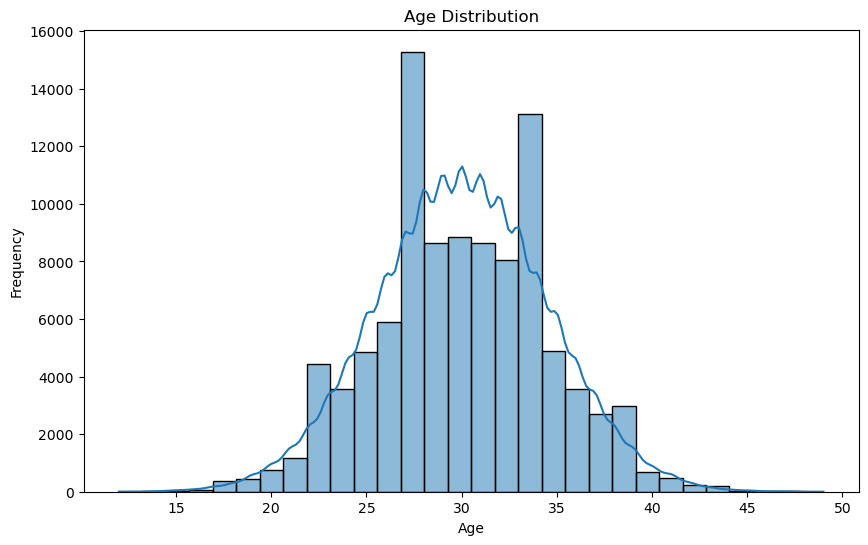

In [715]:

import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))
sns.histplot(custdata_df['age'], kde=True, bins=30).set(title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Age group distribution showing number and ages of active customers

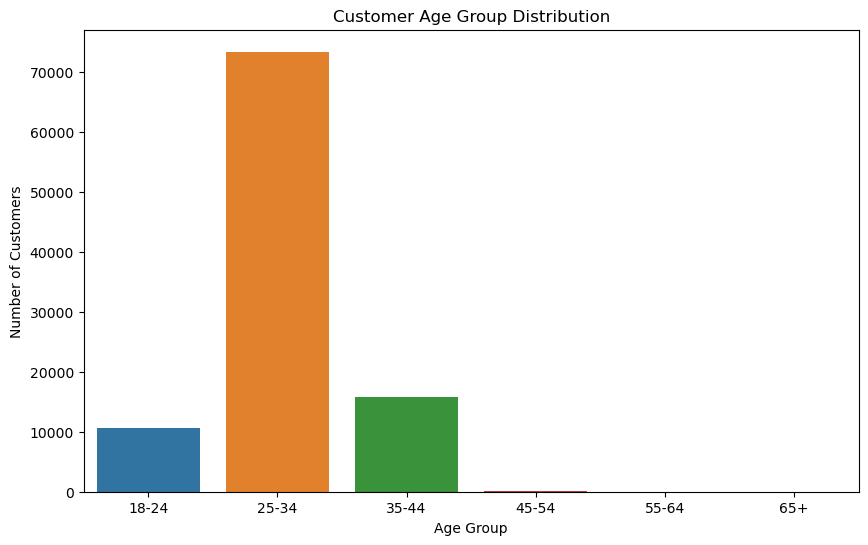

In [717]:
#Divide customers into age groups and calculate the size of each segment.
# Define age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
custdata_df['age_group'] = pd.cut(custdata_df['age'], bins=bins, labels=labels, right=False)

# Calculate the size of each age group
age_group_distribution = custdata_df['age_group'].value_counts().sort_index()

import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values)
plt.title('Customer Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()


This histogram plot visualizes the age distribution of the customer base and we can see that their ages ranges from less than 15yrs to almost 50yrs, and the most active customers are between the age of 25yrs and 34yrs

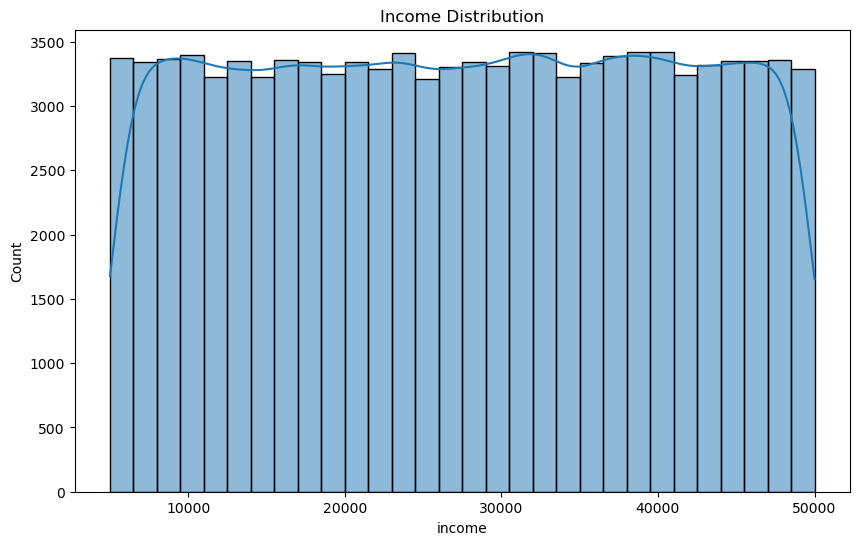

In [719]:
# Histograms for income distribution
plt.figure(figsize=(10, 6))
sns.histplot(custdata_df['income'], kde=True, bins=30).set(title='Income Distribution')
plt.show()

#### The above distribution shows how the level of income is spread among age group and categories

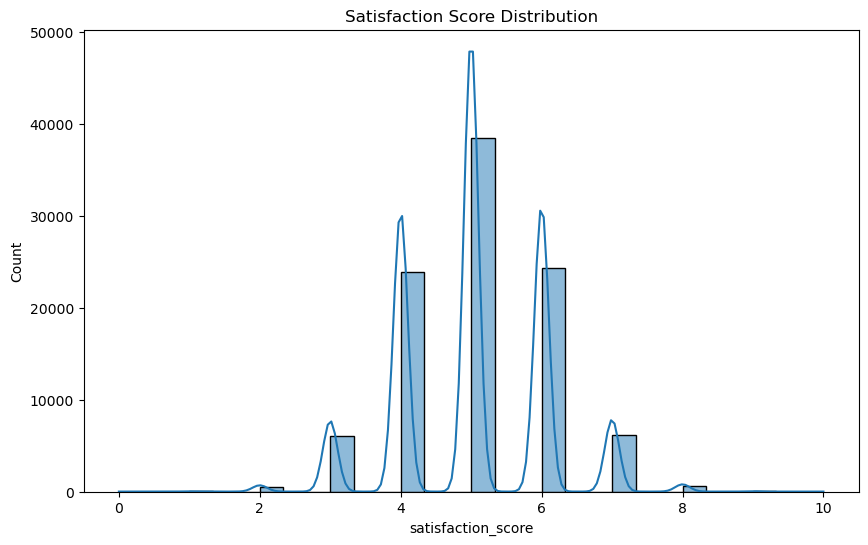

In [721]:
# Histograms for satisfaction score
plt.figure(figsize=(10, 6))
sns.histplot(custdata_df['satisfaction_score'], kde=True, bins=30).set(title='Satisfaction Score Distribution')
plt.show()

#### The above distribution shows the rate of satisfaction score, the satisfaction score for some products is high, while the rate of satisfaction score for some products is low

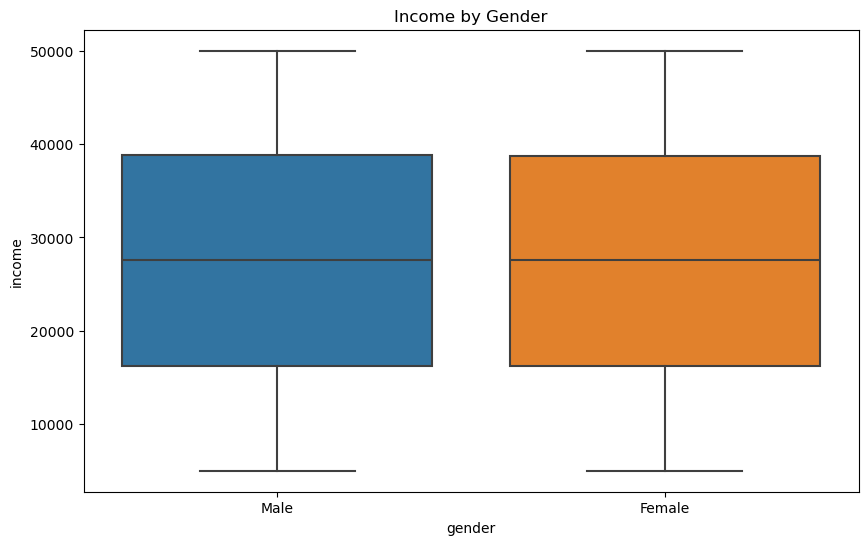

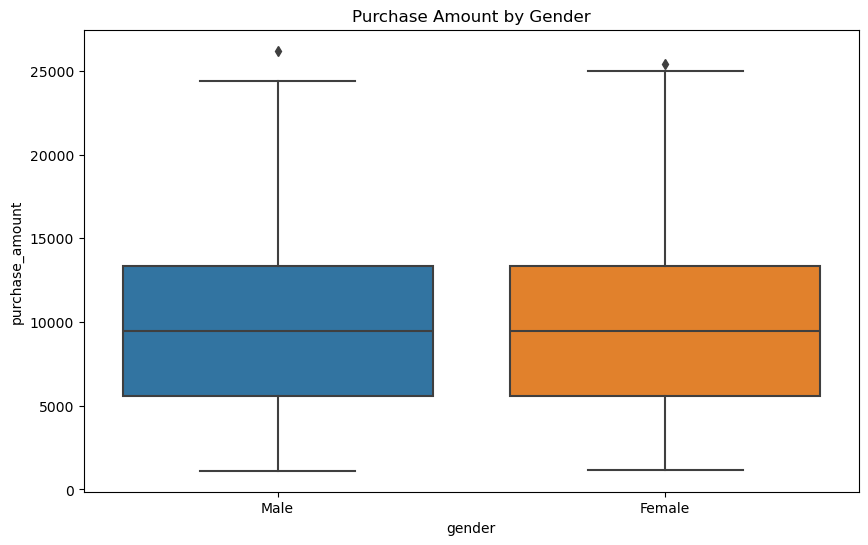

In [723]:
# Box plots for income and purchase amount by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='income', data=custdata_df).set(title='Income by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='purchase_amount', data=custdata_df).set(title='Purchase Amount by Gender')
plt.show()

#### The income and purchasing power of both male and female customers are close to each other, while the income and purchasing power of the male customer is a little bit above that of the female customers with a difference of 0.773623%

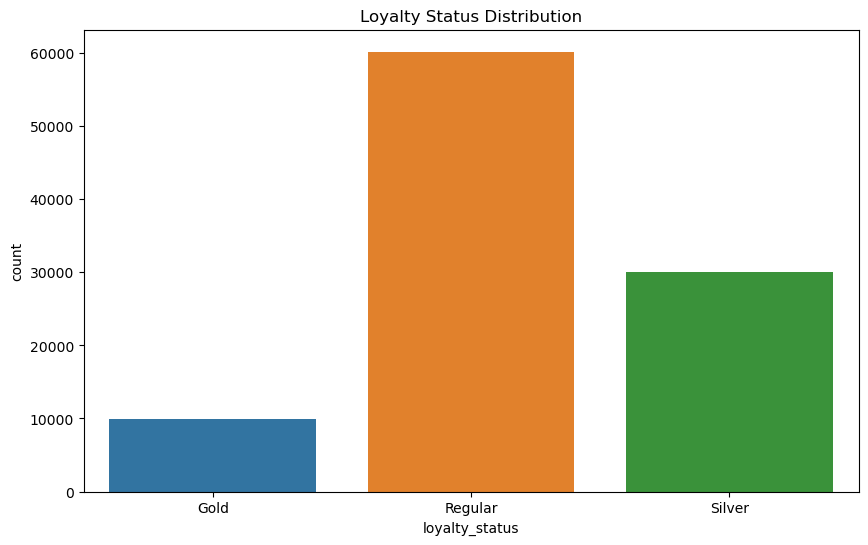

In [725]:
# Bar charts for loyalty status 
plt.figure(figsize=(10, 6))
sns.countplot(x='loyalty_status', data=custdata_df).set(title='Loyalty Status Distribution')
plt.show()


#### The Bar chart shows that the Regular loyal scheme was the most used by customers

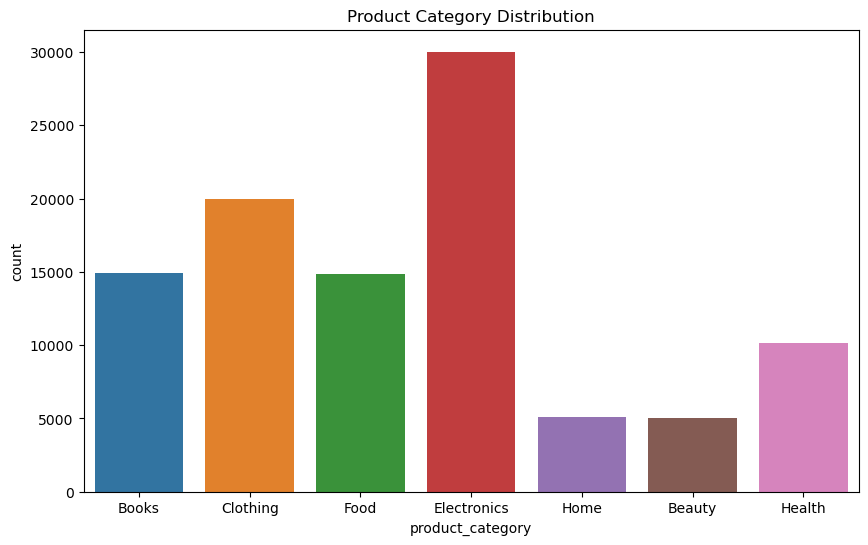

In [727]:
plt.figure(figsize=(10, 6))
sns.countplot(x='product_category', data=custdata_df).set(title='Product Category Distribution')
plt.show()

#### From the above Bar chart Electronics among the categories is the highest purchased product and Home product being the least purchased product

In [729]:
custdata_df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [731]:
genders = ['Male', 'Female']

In [733]:
from sklearn.preprocessing import OrdinalEncoder

In [735]:
enc = OrdinalEncoder(categories = [genders])

In [737]:
enc.fit_transform(custdata_df[['gender']])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [739]:
# Apply Ordinal Encoding to 'gender' column
custdata_df['gender'] = enc.fit_transform(custdata_df[['gender']])

In [741]:
custdata_df['gender']

id
1         0.0
2         0.0
3         0.0
4         0.0
5         1.0
         ... 
99996     1.0
99997     0.0
99998     0.0
99999     1.0
100000    1.0
Name: gender, Length: 100000, dtype: float64

In [743]:
# Apply Ordinal Encoding to 'purchase frequency' column

In [745]:
custdata_df['purchase_frequency'].unique()

array(['frequent', 'rare', 'occasional'], dtype=object)

In [747]:
frequencies = ['frequent', 'rare', 'occasional']

In [749]:
from sklearn.preprocessing import OrdinalEncoder

In [751]:
enc = OrdinalEncoder(categories = [frequencies])

In [753]:
enc.fit_transform(custdata_df[['purchase_frequency']])

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [755]:
custdata_df['purchase_frequency'] = enc.fit_transform(custdata_df[['purchase_frequency']])

### Statistics showing the average purchase frequency, purchase amount, and satisfaction score by gender

Info of the dataframe after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   age                 100000 non-null  int64   
 1   gender              100000 non-null  float64 
 2   income              100000 non-null  int64   
 3   education           100000 non-null  object  
 4   region              100000 non-null  object  
 5   loyalty_status      100000 non-null  object  
 6   purchase_frequency  100000 non-null  float64 
 7   purchase_amount     100000 non-null  int64   
 8   product_category    100000 non-null  object  
 9   promotion_usage     100000 non-null  int64   
 10  satisfaction_score  100000 non-null  int64   
 11  age_group           99732 non-null   category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 9.3+ MB
None
Gender stats:
   gender  purchase_frequency  purchase_amount  

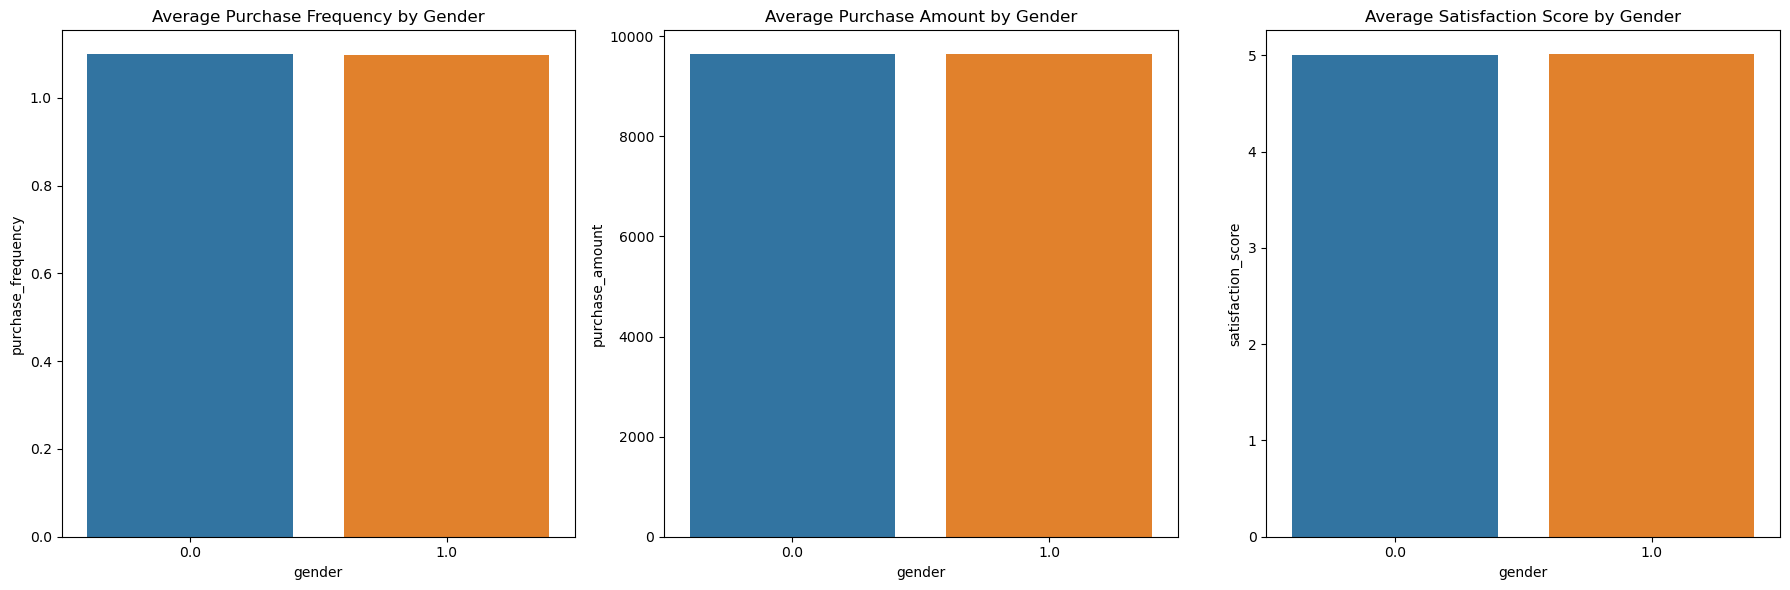

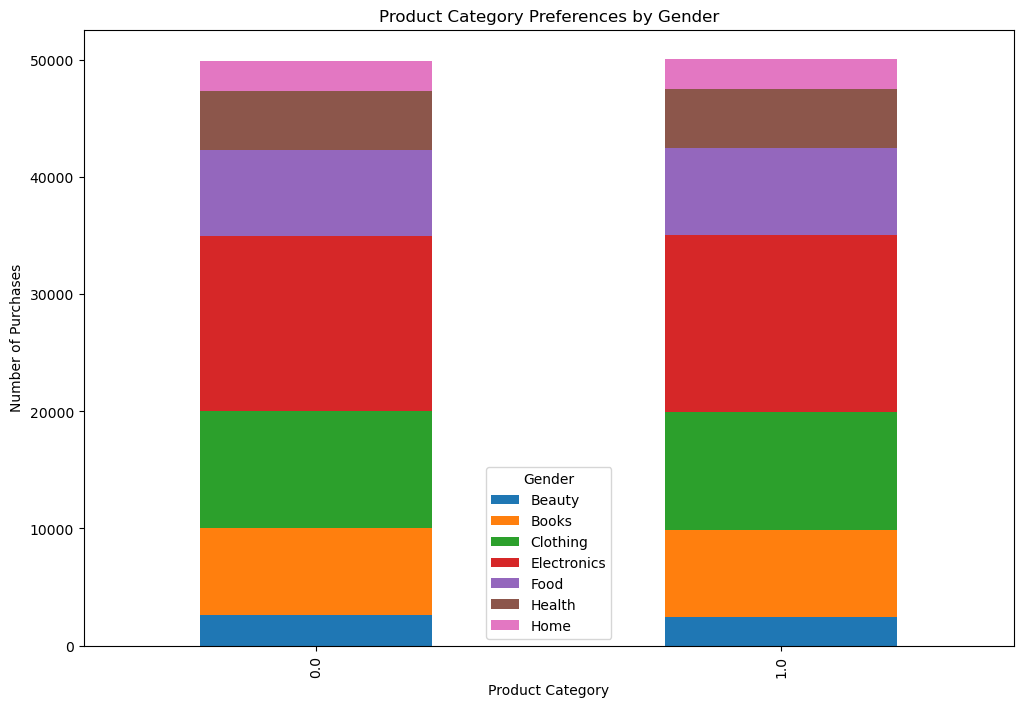

In [757]:
# Convert relevant columns to numeric
custdata_df['purchase_frequency'] = pd.to_numeric(custdata_df['purchase_frequency'], errors='coerce')
custdata_df['purchase_amount'] = pd.to_numeric(custdata_df['purchase_amount'], errors='coerce')
custdata_df['satisfaction_score'] = pd.to_numeric(custdata_df['satisfaction_score'], errors='coerce')

# Drop rows with NaN values in the critical columns
custdata_df.dropna(subset=['gender', 'purchase_frequency', 'purchase_amount', 'product_category', 'satisfaction_score'], inplace=True)

# Check the info of the dataframe to ensure no NaN values
print("Info of the dataframe after cleaning:")
print(custdata_df.info())

# Calculate average purchase frequency, amount, and satisfaction score for each gender
gender_stats = custdata_df.groupby('gender').agg({
    'purchase_frequency': 'mean',
    'purchase_amount': 'mean',
    'satisfaction_score': 'mean'
}).reset_index()

# Print the stats to verify
print("Gender stats:")
print(gender_stats)

# Calculate the count of each product category preferred by each gender
product_category_stats = custdata_df.groupby(['gender', 'product_category']).size().unstack(fill_value=0)

# Print the stats to verify
print("Product category stats:")
print(product_category_stats)

# Plot average purchase frequency, amount, and satisfaction score by gender
if not gender_stats.empty:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.barplot(x='gender', y='purchase_frequency', data=gender_stats, ax=axes[0])
    axes[0].set_title('Average Purchase Frequency by Gender')

    sns.barplot(x='gender', y='purchase_amount', data=gender_stats, ax=axes[1])
    axes[1].set_title('Average Purchase Amount by Gender')

    sns.barplot(x='gender', y='satisfaction_score', data=gender_stats, ax=axes[2])
    axes[2].set_title('Average Satisfaction Score by Gender')

    plt.tight_layout()
    plt.show()
else:
    print("No data to plot for gender satisfaction scores")

# Plot product category preferences by gender
if not product_category_stats.empty:
    product_category_stats.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Product Category Preferences by Gender')
    plt.xlabel('Product Category')
    plt.ylabel('Number of Purchases')
    plt.legend(title='Gender')
    plt.show()
else:
    print("No data to plot for product category preferences by gender")

##### The above statistics calculates the average purchase frequency, purchase amount, and satisfaction score for different genders, as well as the preferences for different product categories. 
##### We used bar plots to visualize the results, the use of bar plots help identify patterns and differences in purchase behavior and preferences between genders. 
##### We can also see that frequency of purchase and purchase amount of each category of products between the Male and Female is almost at par, the difference in purchase amount and frequency of purchase is about: Frequency of purchase: 0.00155, Purchase amount: 0.773623 
##### Satisfaction score male: 5.010544 satisfaction score female: 5.008753

### Examine the correlation between income levels and purchase frequency/amount

In [759]:
# Calculate correlation matrix
correlation_matrix = custdata_df[['income', 'purchase_frequency', 'purchase_amount']].corr()

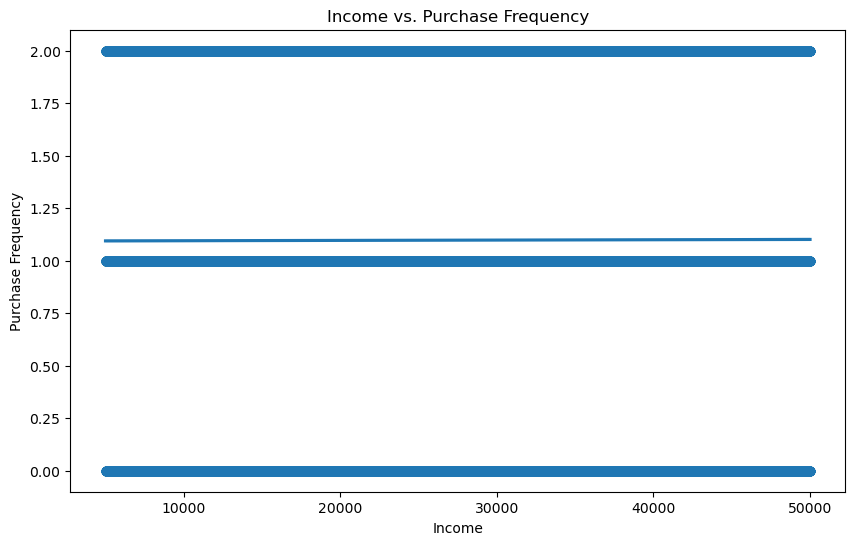

In [761]:
# Scatter plot and regression line for income vs. purchase frequency
plt.figure(figsize=(10, 6))
sns.regplot(x='income', y='purchase_frequency', data=custdata_df)
plt.title('Income vs. Purchase Frequency')
plt.xlabel('Income')
plt.ylabel('Purchase Frequency')
plt.show()


#### The above plot visualizes the relationship between income and frequency of purchase of goods, the correlation shows increase in income with a corresponding increase in purchase frequency. 

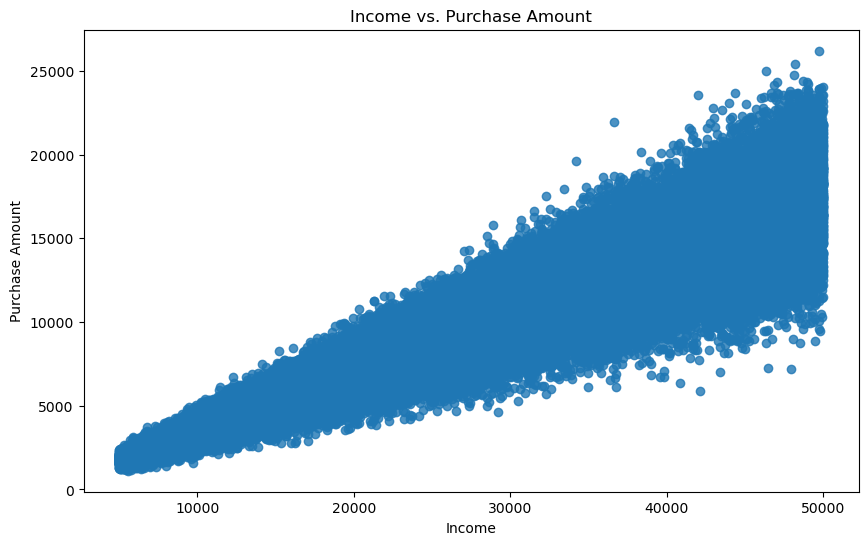

In [763]:
# Scatter plot and regression line for income vs. purchase amount
plt.figure(figsize=(10, 6))
sns.regplot(x='income', y='purchase_amount', data=custdata_df)
plt.title('Income vs. Purchase Amount')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.show()

#### The scatter plot shows a relationship between income and purchase amount, as long as their is an increase in income of a customer, the customer would be willing to purchase products irrespecting of the increase in amount of the product category.

Promotion analysis:
                purchase_amount              
promotion_usage               0             1
income_group                                 
Low                 3714.133383   3704.102738
Medium              7671.852732   7683.388076
High               11617.284354  11632.023268
Very High          15541.614151  15506.498211


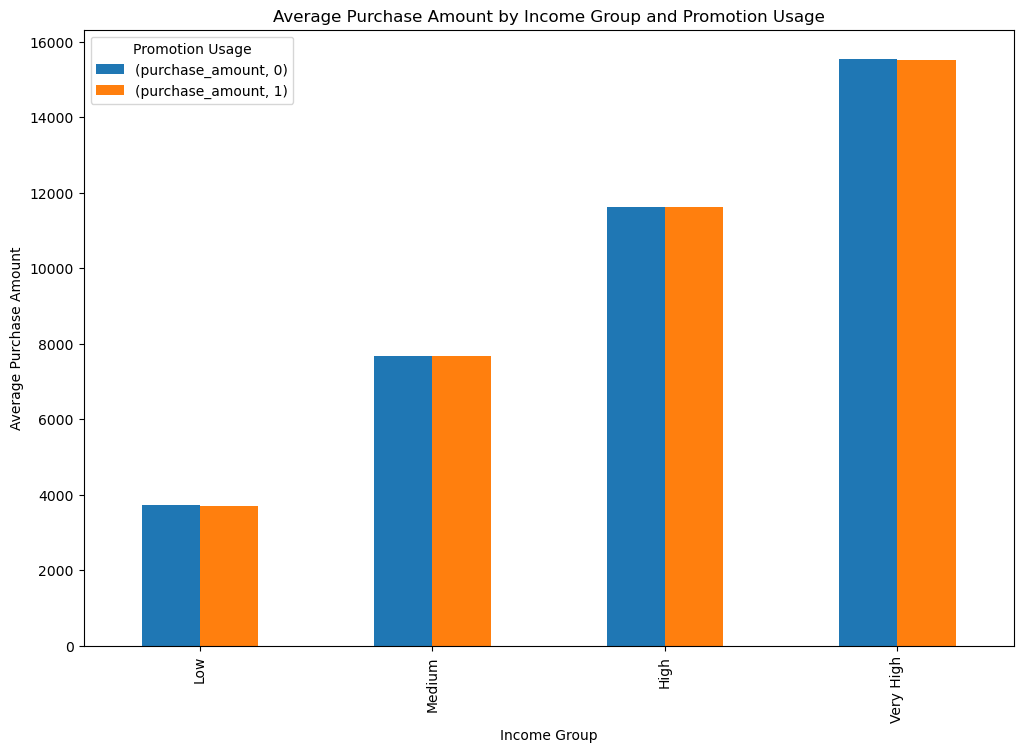

In [765]:
# Create income groups
custdata_df['income_group'] = pd.qcut(custdata_df['income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate average purchase amount with promotions for each income group
promotion_analysis = custdata_df.groupby(['income_group', 'promotion_usage']).agg({
    'purchase_amount': 'mean'
}).unstack(fill_value=0)

print("Promotion analysis:")
print(promotion_analysis)

# Plot the average purchase amount with promotions for each income group
promotion_analysis.plot(kind='bar', figsize=(12, 8))
plt.title('Average Purchase Amount by Income Group and Promotion Usage')
plt.xlabel('Income Group')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Promotion Usage')
plt.show()


#### The bar plot describes the different income group in relationship with the average purchase amount with promotion usage, their are four different income groups of different level of earners; low, medium, high and very high income earners. The relationship describes their capacity and purchase power. 

## Identify regional differences in purchasing behavior, product preferences, and satisfaction scores. 

In [767]:
# Calculate average purchase frequency, amount, and satisfaction score for each region
regional_stats = custdata_df.groupby('region').agg({
    'purchase_frequency': 'mean',
    'purchase_amount': 'mean',
    'satisfaction_score': 'mean'
}).reset_index()

print("Regional stats:")
print(regional_stats)

# Calculate the count of each product category preferred by each region
product_category_stats = custdata_df.groupby(['region', 'product_category']).size().unstack(fill_value=0)

print("Product category stats:")
print(product_category_stats)


Regional stats:
  region  purchase_frequency  purchase_amount  satisfaction_score
0   East            1.095764      9615.410820            5.005087
1  North            1.100663      9673.361834            5.013656
2  South            1.098291      9648.787077            5.012355
3   West            1.097979      9619.211458            5.009754
Product category stats:
product_category  Beauty  Books  Clothing  Electronics  Food  Health  Home
region                                                                    
East                1514   4454      6009         9125  4385    3050  1537
North                961   3034      3910         6003  2974    2024  1012
South               1027   3002      3993         5959  2995    2040  1057
West                1533   4435      6077         8940  4468    3009  1473


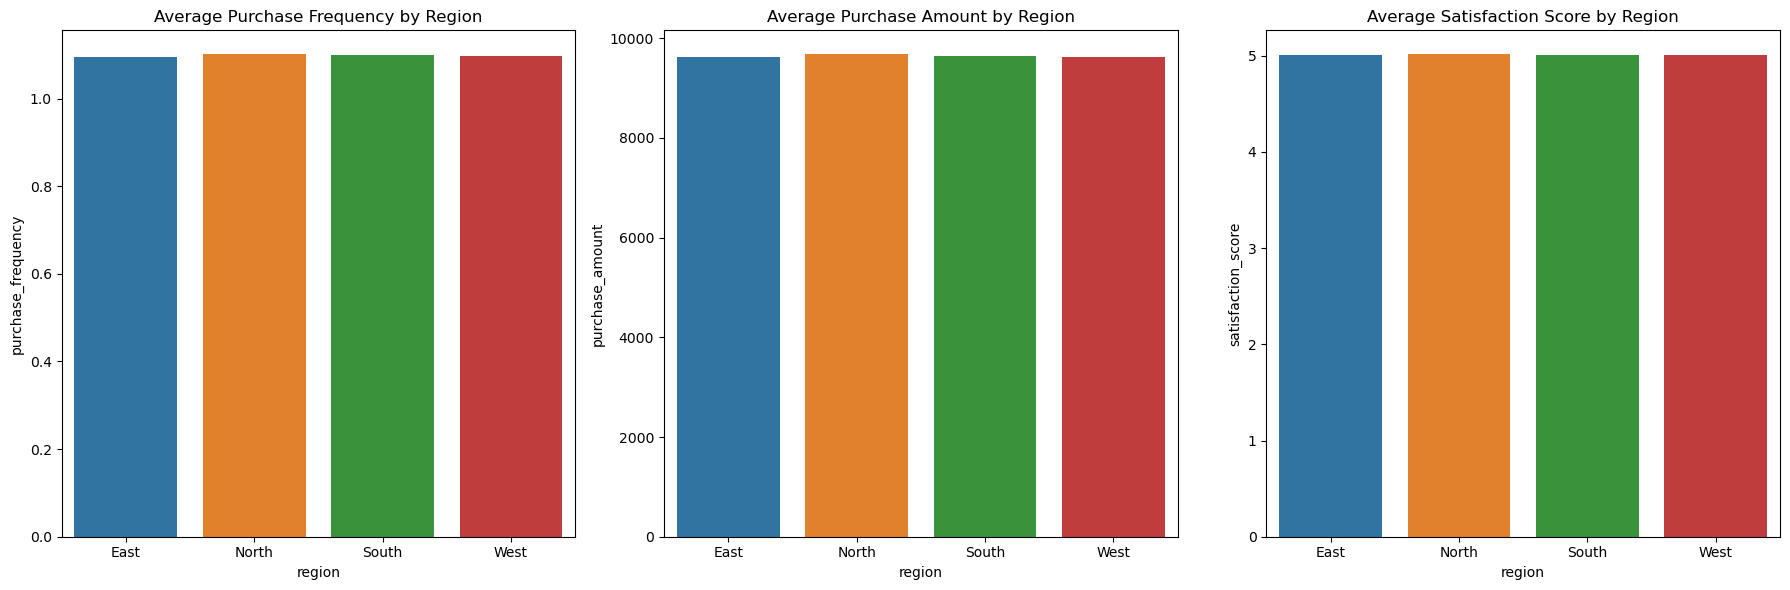

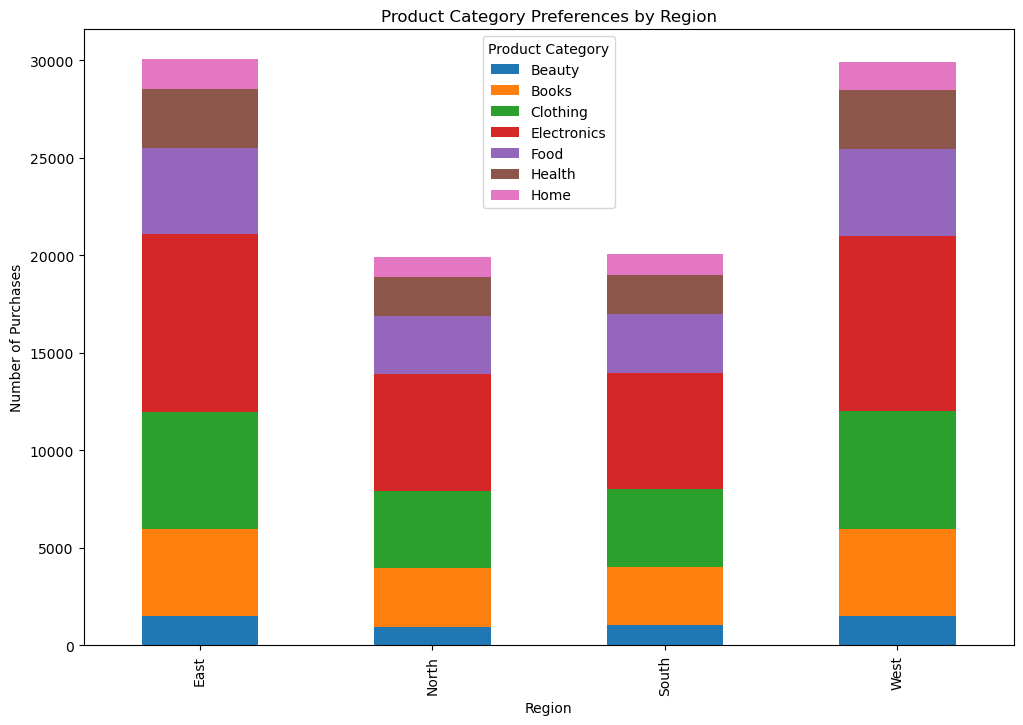

In [769]:
# Plot average purchase frequency, amount, and satisfaction score by region
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='region', y='purchase_frequency', data=regional_stats, ax=axes[0])
axes[0].set_title('Average Purchase Frequency by Region')

sns.barplot(x='region', y='purchase_amount', data=regional_stats, ax=axes[1])
axes[1].set_title('Average Purchase Amount by Region')

sns.barplot(x='region', y='satisfaction_score', data=regional_stats, ax=axes[2])
axes[2].set_title('Average Satisfaction Score by Region')

plt.tight_layout()
plt.show()

# Plot product category preferences by region
if not product_category_stats.empty:
    product_category_stats.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Product Category Preferences by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Purchases')
    plt.legend(title='Product Category')
    plt.show()
else:
    print("No data to plot for product category preferences by region")


This analysis helps identify regional differences in purchasing behavior, product preferences, and satisfaction scores. By visualizing these differences, we can tailor marketing strategies for different regions, such as:

 - Targeted Promotions: Offer region-specific promotions based on product preferences.
 - Customer Engagement: Enhance customer satisfaction by focusing on the needs and preferences of each region.
 - Product Distribution: Optimize product distribution based on regional demand and preferences.

## We need to Analyze how different loyalty statuses affect purchase frequency and amounts.

In [771]:
# Calculate average purchase frequency and purchase amount for each loyalty status
loyalty_stats = custdata_df.groupby('loyalty_status').agg({
    'purchase_frequency': 'mean',
    'purchase_amount': 'mean'
}).reset_index()

print("Loyalty stats:")
print(loyalty_stats)


Loyalty stats:
  loyalty_status  purchase_frequency  purchase_amount
0           Gold            1.094969      9621.487573
1        Regular            1.100569      9639.976537
2         Silver            1.093546      9628.777566


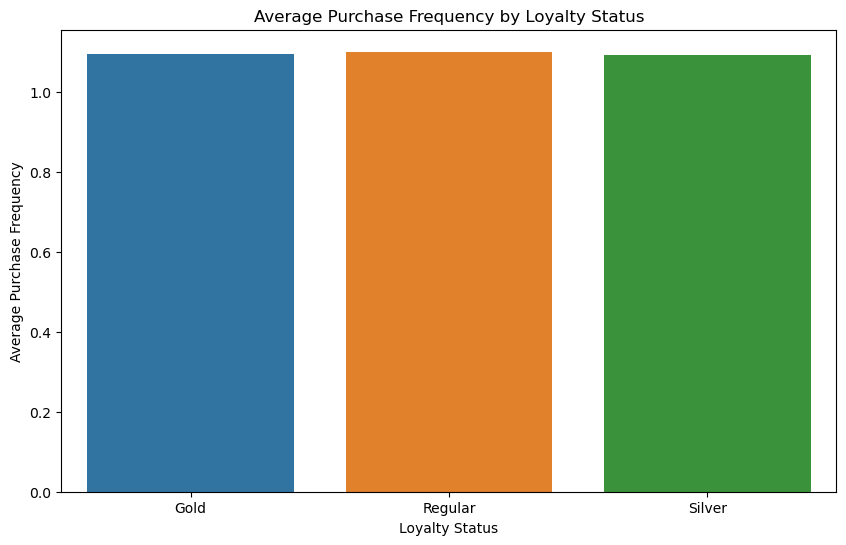

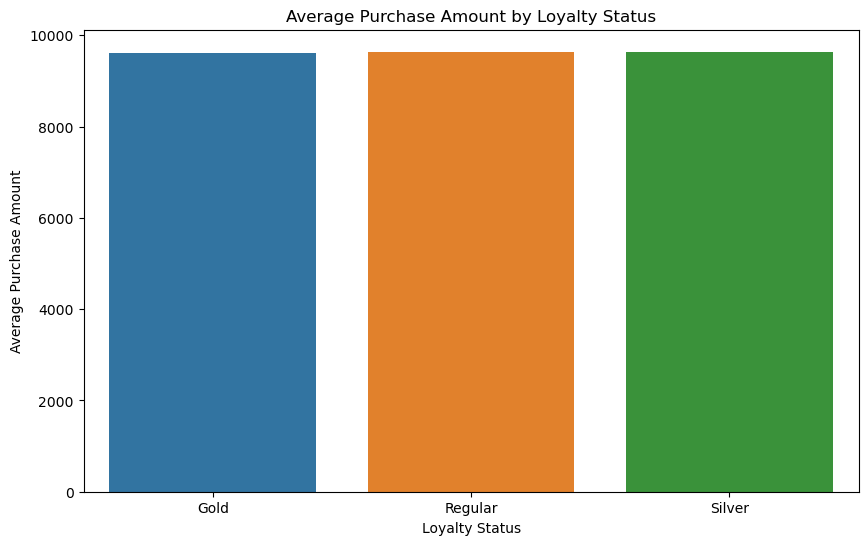

In [773]:
# Plot average purchase frequency by loyalty status
plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_status', y='purchase_frequency', data=loyalty_stats)
plt.title('Average Purchase Frequency by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Purchase Frequency')
plt.show()

# Plot average purchase amount by loyalty status
plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_status', y='purchase_amount', data=loyalty_stats)
plt.title('Average Purchase Amount by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Purchase Amount')
plt.show()


This analysis helps to understand how different loyalty statuses affect purchase behavior. The visualization shows whether customers with higher loyalty statuses have increased purchase frequency and amounts. These insights can help in:

- Loyalty Programs: Enhancing loyalty programs to increase customer engagement and spending.
- Targeted Marketing: Designing targeted marketing strategies for different loyalty segments.
- Customer Retention: Focusing on retaining high-value customers with higher loyalty statuses.

## We will be analyzing the impact of promotions on purchase frequency and amounts.

In [775]:
# Calculate average purchase frequency and purchase amount for different levels of promotion usage
promotion_stats = custdata_df.groupby('promotion_usage').agg({
    'purchase_frequency': 'mean',
    'purchase_amount': 'mean'
}).reset_index()

print("Promotion stats:")
print(promotion_stats)


Promotion stats:
   promotion_usage  purchase_frequency  purchase_amount
0                0            1.097669      9631.150901
1                1            1.098471      9643.251762


Use bar plots to visualize the differences in purchase frequency and purchase amount for different levels of promotion usage.

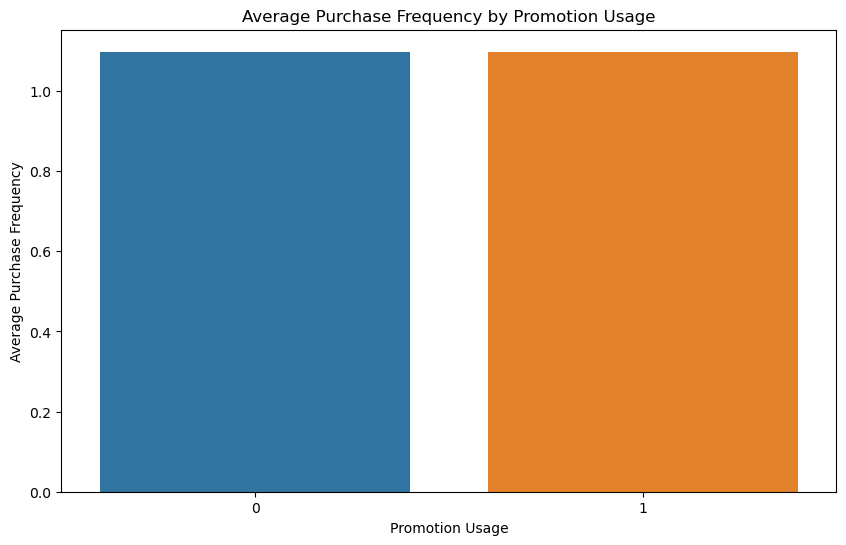

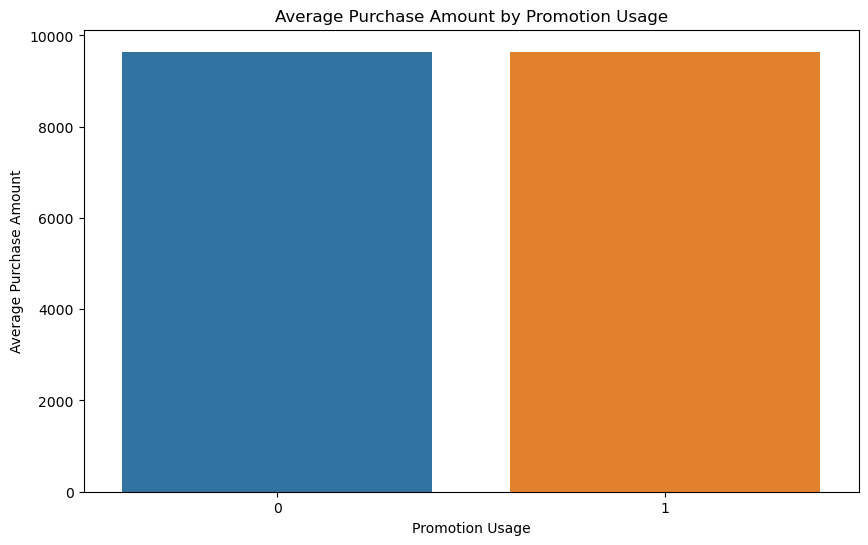

In [777]:
# Plot average purchase frequency by promotion usage
plt.figure(figsize=(10, 6))
sns.barplot(x='promotion_usage', y='purchase_frequency', data=promotion_stats)
plt.title('Average Purchase Frequency by Promotion Usage')
plt.xlabel('Promotion Usage')
plt.ylabel('Average Purchase Frequency')
plt.show()

# Plot average purchase amount by promotion usage
plt.figure(figsize=(10, 6))
sns.barplot(x='promotion_usage', y='purchase_amount', data=promotion_stats)
plt.title('Average Purchase Amount by Promotion Usage')
plt.xlabel('Promotion Usage')
plt.ylabel('Average Purchase Amount')
plt.show()


#### This analysis helps to understand the impact of promotions on purchasing behavior. The visualization shows whether customers with high promotion usage have different purchase frequencies and amounts compared to those with low promotion usage. 

## Defining Relationship between satisfaction scores and loyalty status. 

In [779]:
# Calculate average satisfaction score for each loyalty status
loyalty_satisfaction_stats = custdata_df.groupby('loyalty_status').agg({
    'satisfaction_score': 'mean'
}).reset_index()

print("Loyalty Satisfaction stats:")
print(loyalty_satisfaction_stats)


Loyalty Satisfaction stats:
  loyalty_status  satisfaction_score
0           Gold            5.013033
1        Regular            5.008198
2         Silver            5.011447


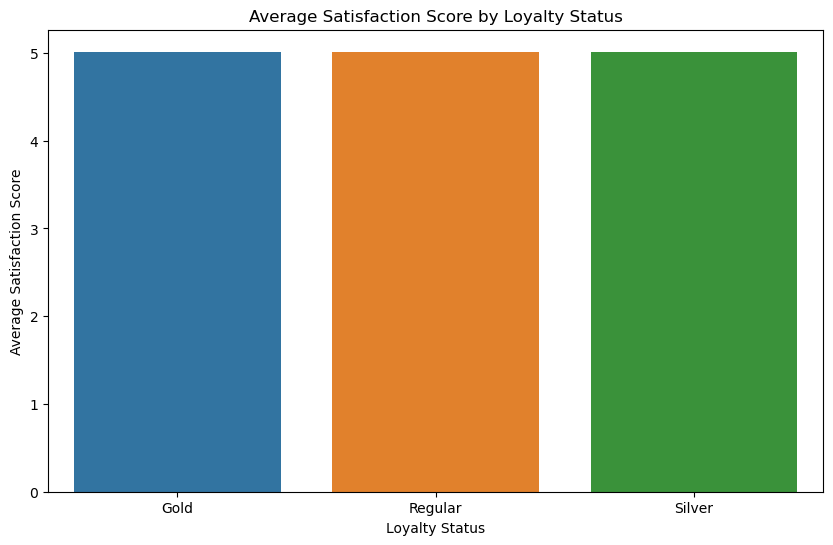

In [781]:
#Use bar plots to visualize the differences in satisfaction scores for each loyalty status.
# Plot average satisfaction score by loyalty status
plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_status', y='satisfaction_score', data=loyalty_satisfaction_stats)
plt.title('Average Satisfaction Score by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Satisfaction Score')
plt.show()


This analysis helps to understand the relationship between satisfaction scores and loyalty status. The visualization shows whether customers with higher satisfaction scores have higher loyalty statuses. These insights can help in:

- Customer Retention: Focusing on strategies to improve customer satisfaction to enhance loyalty.
- Loyalty Programs: Developing and refining loyalty programs to reward high satisfaction and loyalty.
- Customer Experience: Improving the overall customer experience to increase satisfaction and retention.

## Let's Calculate the average satisfaction scores and other variables

Calculate average satisfaction scores for different segments such as product categories, customer service, and pricing.

In [836]:
# Calculate average satisfaction score and purchase behavior by gender
gender_stats = custdata_df.groupby('gender').agg({
    'satisfaction_score': 'mean',
    'purchase_frequency': 'mean',
    'purchase_amount': 'mean'
}).reset_index()

print("Gender stats:")
print(gender_stats)

Gender stats:
   gender  satisfaction_score  purchase_frequency  purchase_amount
0     0.0            5.008753            1.098686      9635.178224
1     1.0            5.010544            1.097136      9634.404601


In [807]:
# Calculate correlation between income levels and purchase behavior
income_stats = custdata_df.groupby('income_group').agg({
    'purchase_frequency': 'mean',
    'purchase_amount': 'mean',
    'satisfaction_score': 'mean'
}).reset_index()

print("Income Group stats:")
print(income_stats)

Income Group stats:
  income_group  purchase_frequency  purchase_amount  satisfaction_score
0          Low             1.09756       3711.11456             4.99876
1       Medium             1.09084       7675.28888             5.01476
2         High             1.10020      11621.74376             5.01708
3    Very High             1.10304      15531.01616             5.00800


In [809]:
# Calculate regional differences in purchasing behavior and satisfaction scores
region_stats = custdata_df.groupby('region').agg({
    'purchase_frequency': 'mean',
    'purchase_amount': 'mean',
    'satisfaction_score': 'mean'
}).reset_index()

print("Region stats:")
print(region_stats)

Region stats:
  region  purchase_frequency  purchase_amount  satisfaction_score
0   East            1.095764      9615.410820            5.005087
1  North            1.100663      9673.361834            5.013656
2  South            1.098291      9648.787077            5.012355
3   West            1.097979      9619.211458            5.009754


In [811]:
# Calculate impact of promotions on purchase behavior
promotion_stats = custdata_df.groupby('promotion_usage').agg({
    'purchase_frequency': 'mean',
    'purchase_amount': 'mean',
    'satisfaction_score': 'mean'
}).reset_index()

print("Promotion Usage stats:")
print(promotion_stats)

Promotion Usage stats:
   promotion_usage  purchase_frequency  purchase_amount  satisfaction_score
0                0            1.097669      9631.150901            5.009425
1                1            1.098471      9643.251762            5.010173


In [813]:
# Calculate relationship between satisfaction scores and loyalty status
loyalty_stats = custdata_df.groupby('loyalty_status').agg({
    'purchase_frequency': 'mean',
    'purchase_amount': 'mean',
    'satisfaction_score': 'mean'
}).reset_index()

print("Loyalty Status stats:")
print(loyalty_stats)

Loyalty Status stats:
  loyalty_status  purchase_frequency  purchase_amount  satisfaction_score
0           Gold            1.094969      9621.487573            5.013033
1        Regular            1.100569      9639.976537            5.008198
2         Silver            1.093546      9628.777566            5.011447


Recommendations
## Based on the findings, here are specific recommendations for each aspect:

1. Product Categories
- Improve Product Quality: Focus on product categories with the lowest satisfaction scores. Conduct detailed quality assessments to identify and rectify any defects or shortcomings.
- Enhance Features: Gather customer feedback to understand which features are lacking or need improvement. Implement enhancements to meet customer expectations.
- User Experience: Ensure that the products are user-friendly and meet the needs of your target audience. Consider redesigning products with low satisfaction scores to improve usability.
2. Customer Service Interactions
- Training Programs: Implement comprehensive training programs for customer service representatives, especially for interaction types with low satisfaction scores. Focus on improving communication skills, problem-solving abilities, and product knowledge.
- Feedback Mechanism: Establish a robust feedback mechanism to regularly gather customer opinions on their service experience. Use this feedback to continuously improve customer service processes.
- Empower Customer Service Reps: Empower customer service representatives with the tools and authority to resolve customer issues efficiently. This can lead to quicker resolutions and higher customer satisfaction.
3. Pricing Strategies
- Review Pricing Models: Analyze the pricing strategies that correspond to lower satisfaction scores. Consider whether these pricing models offer perceived value to the customers and adjust accordingly.
- Transparency in Pricing: Ensure that pricing is transparent and customers understand what they are paying for. Hidden fees or complex pricing structures can lead to dissatisfaction.
- Promotional Offers: Evaluate the effectiveness of current promotional offers. Ensure that promotions provide real value and are not perceived as misleading.
Action Plan
- Data-Driven Decision Making: Use the insights from the satisfaction score analysis to prioritize areas for improvement. Regularly update the analysis to track the impact of changes and identify new areas of concern.
- Customer Feedback Integration: Integrate customer feedback into your product development, customer service training, and pricing strategy formulation processes.
- Continuous Improvement: Establish a culture of continuous improvement. Regularly monitor satisfaction scores and other key performance indicators (KPIs) to ensure ongoing enhancement of customer experience.